In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from numpy import *

# Imports
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from gensim.models import word2vec


# initial imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

[nltk_data] Downloading package stopwords to /home/aman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/aman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
all_data_with_sent = pd.read_csv('data/data_with_sentiment_score_and_one_hot.csv')
train_data_with_vecs = pd.read_csv('data/large_files/trainDataVecs.csv', header=None)
test_data_with_vecs = pd.read_csv('data/large_files/testDataVecs.csv', header=None)

In [4]:
y_train = train.age.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['age'], axis=1, inplace=True)

In [5]:
data['year'] = data['date'].str[-4:]
data.head()

,date,gender,post.id,sign,text,topic,user.id,year
0,"14,May,2004",male,1,Leo,"Info has been found (+/- 100 pages,...",Student,11869,2004
1,"13,May,2004",male,2,Leo,These are the team members: Drewe...,Student,11869,2004
2,"12,May,2004",male,3,Leo,In het kader van kernfusie op aarde...,Student,11869,2004
3,"12,May,2004",male,4,Leo,testing!!! testing!!!,Student,11869,2004
4,"11,June,2004",male,5,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,InvestmentBanking,16332,2004


In [3]:
def sentence_to_wordlist(review, remove_stopwords=False):
    review_text = BeautifulSoup(review).get_text()
    review_text = re.sub("[^a-zA-Z]", " ", review_text)
    review_text = re.sub(' +',' ', review_text)
    review_text = re.sub(r'[^\w\s]','',review_text)
    words = review_text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return words

In [4]:
# Word2Vec expects single sentences, 
# each one as a list of words. 
# In other words, the input format is a list of lists.
def review_to_sentences(review, tokenizer, remove_stopwords=False):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(sentence_to_wordlist(raw_sentence, remove_stopwords))
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [5]:
data = pd.concat((train, test)).reset_index(drop=True)

In [7]:
sentences = []
counter = 0
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
print ("Parsing sentences from data set")
for review in data["text"]:
    if counter % 10000 == 0:
        print(counter)
    counter +=1
    sentences += review_to_sentences(review, tokenizer, remove_stopwords=True)

Parsing sentences from data set
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000


In [8]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 400    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 8       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "400features_40minwords_10context"
model.save(model_name)

2018-10-08 05:33:07,065 : INFO : collecting all words and their counts
2018-10-08 05:33:07,066 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-08 05:33:07,093 : INFO : PROGRESS: at sentence #10000, processed 82036 words, keeping 13964 word types
2018-10-08 05:33:07,119 : INFO : PROGRESS: at sentence #20000, processed 159029 words, keeping 20864 word types
2018-10-08 05:33:07,141 : INFO : PROGRESS: at sentence #30000, processed 226837 words, keeping 24584 word types
2018-10-08 05:33:07,169 : INFO : PROGRESS: at sentence #40000, processed 313265 words, keeping 29625 word types
2018-10-08 05:33:07,196 : INFO : PROGRESS: at sentence #50000, processed 395778 words, keeping 33557 word types
2018-10-08 05:33:07,223 : INFO : PROGRESS: at sentence #60000, processed 471737 words, keeping 37455 word types
2018-10-08 05:33:07,252 : INFO : PROGRESS: at sentence #70000, processed 560271 words, keeping 41216 word types
2018-10-08 05:33:07,274 : INFO : PROGRESS: at s

Training model...


2018-10-08 05:33:07,299 : INFO : PROGRESS: at sentence #90000, processed 678264 words, keeping 43944 word types
2018-10-08 05:33:07,328 : INFO : PROGRESS: at sentence #100000, processed 760981 words, keeping 46929 word types
2018-10-08 05:33:07,355 : INFO : PROGRESS: at sentence #110000, processed 835924 words, keeping 50060 word types
2018-10-08 05:33:07,383 : INFO : PROGRESS: at sentence #120000, processed 917511 words, keeping 52107 word types
2018-10-08 05:33:07,413 : INFO : PROGRESS: at sentence #130000, processed 1004723 words, keeping 55168 word types
2018-10-08 05:33:07,442 : INFO : PROGRESS: at sentence #140000, processed 1084802 words, keeping 58078 word types
2018-10-08 05:33:07,467 : INFO : PROGRESS: at sentence #150000, processed 1157493 words, keeping 60005 word types
2018-10-08 05:33:07,496 : INFO : PROGRESS: at sentence #160000, processed 1236053 words, keeping 61480 word types
2018-10-08 05:33:07,521 : INFO : PROGRESS: at sentence #170000, processed 1299891 words, keep

2018-10-08 05:33:09,264 : INFO : PROGRESS: at sentence #810000, processed 6077877 words, keeping 145384 word types
2018-10-08 05:33:09,289 : INFO : PROGRESS: at sentence #820000, processed 6147102 words, keeping 145948 word types
2018-10-08 05:33:09,325 : INFO : PROGRESS: at sentence #830000, processed 6252054 words, keeping 149985 word types
2018-10-08 05:33:09,353 : INFO : PROGRESS: at sentence #840000, processed 6325323 words, keeping 150886 word types
2018-10-08 05:33:09,405 : INFO : PROGRESS: at sentence #850000, processed 6403982 words, keeping 151631 word types
2018-10-08 05:33:09,431 : INFO : PROGRESS: at sentence #860000, processed 6472429 words, keeping 152516 word types
2018-10-08 05:33:09,462 : INFO : PROGRESS: at sentence #870000, processed 6559044 words, keeping 153768 word types
2018-10-08 05:33:09,488 : INFO : PROGRESS: at sentence #880000, processed 6626933 words, keeping 155181 word types
2018-10-08 05:33:09,515 : INFO : PROGRESS: at sentence #890000, processed 670127

2018-10-08 05:33:11,375 : INFO : PROGRESS: at sentence #1520000, processed 11587029 words, keeping 213267 word types
2018-10-08 05:33:11,408 : INFO : PROGRESS: at sentence #1530000, processed 11676759 words, keeping 214884 word types
2018-10-08 05:33:11,434 : INFO : PROGRESS: at sentence #1540000, processed 11745060 words, keeping 215342 word types
2018-10-08 05:33:11,463 : INFO : PROGRESS: at sentence #1550000, processed 11822892 words, keeping 216358 word types
2018-10-08 05:33:11,489 : INFO : PROGRESS: at sentence #1560000, processed 11889382 words, keeping 217005 word types
2018-10-08 05:33:11,511 : INFO : PROGRESS: at sentence #1570000, processed 11943009 words, keeping 217115 word types
2018-10-08 05:33:11,538 : INFO : PROGRESS: at sentence #1580000, processed 12016576 words, keeping 217659 word types
2018-10-08 05:33:11,567 : INFO : PROGRESS: at sentence #1590000, processed 12093805 words, keeping 218546 word types
2018-10-08 05:33:11,593 : INFO : PROGRESS: at sentence #1600000,

2018-10-08 05:33:13,401 : INFO : PROGRESS: at sentence #2230000, processed 16900626 words, keeping 271149 word types
2018-10-08 05:33:13,428 : INFO : PROGRESS: at sentence #2240000, processed 16971834 words, keeping 271581 word types
2018-10-08 05:33:13,457 : INFO : PROGRESS: at sentence #2250000, processed 17051805 words, keeping 272782 word types
2018-10-08 05:33:13,485 : INFO : PROGRESS: at sentence #2260000, processed 17125147 words, keeping 273326 word types
2018-10-08 05:33:13,512 : INFO : PROGRESS: at sentence #2270000, processed 17198570 words, keeping 273846 word types
2018-10-08 05:33:13,541 : INFO : PROGRESS: at sentence #2280000, processed 17274469 words, keeping 274409 word types
2018-10-08 05:33:13,571 : INFO : PROGRESS: at sentence #2290000, processed 17356255 words, keeping 275418 word types
2018-10-08 05:33:13,600 : INFO : PROGRESS: at sentence #2300000, processed 17434156 words, keeping 276301 word types
2018-10-08 05:33:13,630 : INFO : PROGRESS: at sentence #2310000,

2018-10-08 05:33:15,396 : INFO : PROGRESS: at sentence #2940000, processed 22091413 words, keeping 319833 word types
2018-10-08 05:33:15,427 : INFO : PROGRESS: at sentence #2950000, processed 22171767 words, keeping 320423 word types
2018-10-08 05:33:15,456 : INFO : PROGRESS: at sentence #2960000, processed 22245716 words, keeping 321102 word types
2018-10-08 05:33:15,485 : INFO : PROGRESS: at sentence #2970000, processed 22321847 words, keeping 321542 word types
2018-10-08 05:33:15,517 : INFO : PROGRESS: at sentence #2980000, processed 22408337 words, keeping 322243 word types
2018-10-08 05:33:15,544 : INFO : PROGRESS: at sentence #2990000, processed 22481145 words, keeping 322811 word types
2018-10-08 05:33:15,569 : INFO : PROGRESS: at sentence #3000000, processed 22546015 words, keeping 323285 word types
2018-10-08 05:33:15,599 : INFO : PROGRESS: at sentence #3010000, processed 22623712 words, keeping 324099 word types
2018-10-08 05:33:15,627 : INFO : PROGRESS: at sentence #3020000,

2018-10-08 05:33:17,459 : INFO : PROGRESS: at sentence #3650000, processed 27456730 words, keeping 362981 word types
2018-10-08 05:33:17,489 : INFO : PROGRESS: at sentence #3660000, processed 27534034 words, keeping 363369 word types
2018-10-08 05:33:17,520 : INFO : PROGRESS: at sentence #3670000, processed 27618067 words, keeping 364018 word types
2018-10-08 05:33:17,552 : INFO : PROGRESS: at sentence #3680000, processed 27702537 words, keeping 364795 word types
2018-10-08 05:33:17,579 : INFO : PROGRESS: at sentence #3690000, processed 27769970 words, keeping 365199 word types
2018-10-08 05:33:17,609 : INFO : PROGRESS: at sentence #3700000, processed 27844728 words, keeping 365798 word types
2018-10-08 05:33:17,638 : INFO : PROGRESS: at sentence #3710000, processed 27924252 words, keeping 366079 word types
2018-10-08 05:33:17,664 : INFO : PROGRESS: at sentence #3720000, processed 27985262 words, keeping 366081 word types
2018-10-08 05:33:17,696 : INFO : PROGRESS: at sentence #3730000,

2018-10-08 05:33:19,564 : INFO : PROGRESS: at sentence #4360000, processed 32893983 words, keeping 401971 word types
2018-10-08 05:33:19,593 : INFO : PROGRESS: at sentence #4370000, processed 32969672 words, keeping 402682 word types
2018-10-08 05:33:19,619 : INFO : PROGRESS: at sentence #4380000, processed 33037825 words, keeping 403172 word types
2018-10-08 05:33:19,648 : INFO : PROGRESS: at sentence #4390000, processed 33114564 words, keeping 403866 word types
2018-10-08 05:33:19,678 : INFO : PROGRESS: at sentence #4400000, processed 33183658 words, keeping 404057 word types
2018-10-08 05:33:19,711 : INFO : PROGRESS: at sentence #4410000, processed 33263700 words, keeping 404652 word types
2018-10-08 05:33:19,739 : INFO : PROGRESS: at sentence #4420000, processed 33332524 words, keeping 405366 word types
2018-10-08 05:33:19,763 : INFO : PROGRESS: at sentence #4430000, processed 33397043 words, keeping 405830 word types
2018-10-08 05:33:19,794 : INFO : PROGRESS: at sentence #4440000,

2018-10-08 05:33:21,704 : INFO : PROGRESS: at sentence #5070000, processed 38391719 words, keeping 438105 word types
2018-10-08 05:33:21,732 : INFO : PROGRESS: at sentence #5080000, processed 38463303 words, keeping 438463 word types
2018-10-08 05:33:21,765 : INFO : PROGRESS: at sentence #5090000, processed 38551614 words, keeping 439597 word types
2018-10-08 05:33:21,796 : INFO : PROGRESS: at sentence #5100000, processed 38636034 words, keeping 440210 word types
2018-10-08 05:33:21,830 : INFO : PROGRESS: at sentence #5110000, processed 38726157 words, keeping 440937 word types
2018-10-08 05:33:21,860 : INFO : PROGRESS: at sentence #5120000, processed 38800925 words, keeping 441638 word types
2018-10-08 05:33:21,891 : INFO : PROGRESS: at sentence #5130000, processed 38878829 words, keeping 441947 word types
2018-10-08 05:33:21,920 : INFO : PROGRESS: at sentence #5140000, processed 38954093 words, keeping 442541 word types
2018-10-08 05:33:21,949 : INFO : PROGRESS: at sentence #5150000,

2018-10-08 05:33:23,772 : INFO : PROGRESS: at sentence #5780000, processed 43596791 words, keeping 471869 word types
2018-10-08 05:33:23,800 : INFO : PROGRESS: at sentence #5790000, processed 43670811 words, keeping 472221 word types
2018-10-08 05:33:23,827 : INFO : PROGRESS: at sentence #5800000, processed 43739193 words, keeping 472604 word types
2018-10-08 05:33:23,859 : INFO : PROGRESS: at sentence #5810000, processed 43825668 words, keeping 473525 word types
2018-10-08 05:33:23,882 : INFO : PROGRESS: at sentence #5820000, processed 43881696 words, keeping 473753 word types
2018-10-08 05:33:23,910 : INFO : PROGRESS: at sentence #5830000, processed 43953546 words, keeping 474193 word types
2018-10-08 05:33:23,939 : INFO : PROGRESS: at sentence #5840000, processed 44028902 words, keeping 474774 word types
2018-10-08 05:33:23,969 : INFO : PROGRESS: at sentence #5850000, processed 44106949 words, keeping 475162 word types
2018-10-08 05:33:24,004 : INFO : PROGRESS: at sentence #5860000,

2018-10-08 05:33:25,814 : INFO : PROGRESS: at sentence #6490000, processed 48877940 words, keeping 505696 word types
2018-10-08 05:33:25,847 : INFO : PROGRESS: at sentence #6500000, processed 48950748 words, keeping 506373 word types
2018-10-08 05:33:25,879 : INFO : PROGRESS: at sentence #6510000, processed 49026748 words, keeping 506761 word types
2018-10-08 05:33:25,911 : INFO : PROGRESS: at sentence #6520000, processed 49103078 words, keeping 507185 word types
2018-10-08 05:33:25,945 : INFO : PROGRESS: at sentence #6530000, processed 49183082 words, keeping 507565 word types
2018-10-08 05:33:25,975 : INFO : PROGRESS: at sentence #6540000, processed 49262102 words, keeping 507889 word types
2018-10-08 05:33:26,003 : INFO : PROGRESS: at sentence #6550000, processed 49327365 words, keeping 508138 word types
2018-10-08 05:33:26,031 : INFO : PROGRESS: at sentence #6560000, processed 49401484 words, keeping 508800 word types
2018-10-08 05:33:26,059 : INFO : PROGRESS: at sentence #6570000,

2018-10-08 05:33:27,889 : INFO : PROGRESS: at sentence #7200000, processed 54246184 words, keeping 539976 word types
2018-10-08 05:33:27,917 : INFO : PROGRESS: at sentence #7210000, processed 54319237 words, keeping 540420 word types
2018-10-08 05:33:27,946 : INFO : PROGRESS: at sentence #7220000, processed 54394037 words, keeping 540631 word types
2018-10-08 05:33:27,970 : INFO : PROGRESS: at sentence #7230000, processed 54452889 words, keeping 540631 word types
2018-10-08 05:33:27,994 : INFO : PROGRESS: at sentence #7240000, processed 54512802 words, keeping 540778 word types
2018-10-08 05:33:28,025 : INFO : PROGRESS: at sentence #7250000, processed 54598270 words, keeping 541384 word types
2018-10-08 05:33:28,053 : INFO : PROGRESS: at sentence #7260000, processed 54669683 words, keeping 541663 word types
2018-10-08 05:33:28,082 : INFO : PROGRESS: at sentence #7270000, processed 54742563 words, keeping 542091 word types
2018-10-08 05:33:28,114 : INFO : PROGRESS: at sentence #7280000,

2018-10-08 05:33:30,039 : INFO : PROGRESS: at sentence #7910000, processed 59666926 words, keeping 572798 word types
2018-10-08 05:33:30,070 : INFO : PROGRESS: at sentence #7920000, processed 59749934 words, keeping 573180 word types
2018-10-08 05:33:30,093 : INFO : PROGRESS: at sentence #7930000, processed 59810091 words, keeping 573353 word types
2018-10-08 05:33:30,121 : INFO : PROGRESS: at sentence #7940000, processed 59882493 words, keeping 574115 word types
2018-10-08 05:33:30,150 : INFO : PROGRESS: at sentence #7950000, processed 59962141 words, keeping 574597 word types
2018-10-08 05:33:30,180 : INFO : PROGRESS: at sentence #7960000, processed 60040634 words, keeping 575183 word types
2018-10-08 05:33:30,210 : INFO : PROGRESS: at sentence #7970000, processed 60118385 words, keeping 575469 word types
2018-10-08 05:33:30,240 : INFO : PROGRESS: at sentence #7980000, processed 60199596 words, keeping 575850 word types
2018-10-08 05:33:30,267 : INFO : PROGRESS: at sentence #7990000,

2018-10-08 05:33:32,129 : INFO : PROGRESS: at sentence #8620000, processed 65131889 words, keeping 603802 word types
2018-10-08 05:33:32,169 : INFO : PROGRESS: at sentence #8630000, processed 65240222 words, keeping 604621 word types
2018-10-08 05:33:32,202 : INFO : PROGRESS: at sentence #8640000, processed 65324715 words, keeping 605385 word types
2018-10-08 05:33:32,231 : INFO : PROGRESS: at sentence #8650000, processed 65400700 words, keeping 605926 word types
2018-10-08 05:33:32,257 : INFO : PROGRESS: at sentence #8660000, processed 65465560 words, keeping 606246 word types
2018-10-08 05:33:32,286 : INFO : PROGRESS: at sentence #8670000, processed 65540945 words, keeping 606404 word types
2018-10-08 05:33:32,313 : INFO : PROGRESS: at sentence #8680000, processed 65612104 words, keeping 606804 word types
2018-10-08 05:33:32,340 : INFO : PROGRESS: at sentence #8690000, processed 65681124 words, keeping 607029 word types
2018-10-08 05:33:32,370 : INFO : PROGRESS: at sentence #8700000,

2018-10-08 05:33:51,838 : INFO : EPOCH 1 - PROGRESS: at 15.84% examples, 628343 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:33:52,854 : INFO : EPOCH 1 - PROGRESS: at 16.75% examples, 629468 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:33:53,863 : INFO : EPOCH 1 - PROGRESS: at 17.76% examples, 629008 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:33:54,881 : INFO : EPOCH 1 - PROGRESS: at 18.77% examples, 629382 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:33:55,903 : INFO : EPOCH 1 - PROGRESS: at 19.79% examples, 629600 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:33:56,907 : INFO : EPOCH 1 - PROGRESS: at 20.80% examples, 630368 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:33:57,913 : INFO : EPOCH 1 - PROGRESS: at 21.83% examples, 628856 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:33:58,949 : INFO : EPOCH 1 - PROGRESS: at 22.92% examples, 629510 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:33:59,954 : INFO : EPOCH 1 - PROGRESS: at 23.84% examples, 629962 words/s,

2018-10-08 05:35:04,987 : INFO : EPOCH 1 - PROGRESS: at 85.97% examples, 618502 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:35:06,005 : INFO : EPOCH 1 - PROGRESS: at 86.96% examples, 618471 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:35:07,042 : INFO : EPOCH 1 - PROGRESS: at 87.94% examples, 618336 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:35:08,045 : INFO : EPOCH 1 - PROGRESS: at 88.85% examples, 618062 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:35:09,046 : INFO : EPOCH 1 - PROGRESS: at 89.74% examples, 617864 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:35:10,058 : INFO : EPOCH 1 - PROGRESS: at 90.75% examples, 617891 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:35:11,063 : INFO : EPOCH 1 - PROGRESS: at 91.51% examples, 617597 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:35:12,070 : INFO : EPOCH 1 - PROGRESS: at 92.59% examples, 617673 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:35:13,080 : INFO : EPOCH 1 - PROGRESS: at 93.51% examples, 617439 words/s,

2018-10-08 05:36:11,935 : INFO : EPOCH 2 - PROGRESS: at 48.67% examples, 603018 words/s, in_qsize 15, out_qsize 1
2018-10-08 05:36:12,948 : INFO : EPOCH 2 - PROGRESS: at 49.60% examples, 602817 words/s, in_qsize 13, out_qsize 2
2018-10-08 05:36:13,962 : INFO : EPOCH 2 - PROGRESS: at 50.52% examples, 603148 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:36:14,994 : INFO : EPOCH 2 - PROGRESS: at 51.48% examples, 603092 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:36:16,015 : INFO : EPOCH 2 - PROGRESS: at 52.45% examples, 602835 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:36:17,031 : INFO : EPOCH 2 - PROGRESS: at 53.33% examples, 602940 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:36:18,057 : INFO : EPOCH 2 - PROGRESS: at 54.28% examples, 602803 words/s, in_qsize 16, out_qsize 2
2018-10-08 05:36:19,083 : INFO : EPOCH 2 - PROGRESS: at 55.20% examples, 602784 words/s, in_qsize 15, out_qsize 3
2018-10-08 05:36:20,089 : INFO : EPOCH 2 - PROGRESS: at 56.04% examples, 602711 words/s,

2018-10-08 05:37:18,885 : INFO : EPOCH 3 - PROGRESS: at 11.42% examples, 603747 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:37:19,904 : INFO : EPOCH 3 - PROGRESS: at 12.41% examples, 604089 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:37:20,928 : INFO : EPOCH 3 - PROGRESS: at 13.35% examples, 602829 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:37:21,951 : INFO : EPOCH 3 - PROGRESS: at 14.28% examples, 602627 words/s, in_qsize 16, out_qsize 1
2018-10-08 05:37:22,960 : INFO : EPOCH 3 - PROGRESS: at 15.22% examples, 602717 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:37:23,961 : INFO : EPOCH 3 - PROGRESS: at 16.03% examples, 601475 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:37:24,975 : INFO : EPOCH 3 - PROGRESS: at 16.86% examples, 600959 words/s, in_qsize 12, out_qsize 3
2018-10-08 05:37:25,982 : INFO : EPOCH 3 - PROGRESS: at 17.89% examples, 601680 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:37:26,984 : INFO : EPOCH 3 - PROGRESS: at 18.86% examples, 602956 words/s,

2018-10-08 05:38:32,020 : INFO : EPOCH 3 - PROGRESS: at 80.15% examples, 603352 words/s, in_qsize 15, out_qsize 1
2018-10-08 05:38:33,031 : INFO : EPOCH 3 - PROGRESS: at 80.97% examples, 603353 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:38:34,037 : INFO : EPOCH 3 - PROGRESS: at 81.91% examples, 603223 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:38:35,038 : INFO : EPOCH 3 - PROGRESS: at 82.83% examples, 603158 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:38:36,060 : INFO : EPOCH 3 - PROGRESS: at 83.77% examples, 603222 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:38:37,125 : INFO : EPOCH 3 - PROGRESS: at 84.75% examples, 602761 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:38:38,144 : INFO : EPOCH 3 - PROGRESS: at 85.69% examples, 602836 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:38:39,149 : INFO : EPOCH 3 - PROGRESS: at 86.67% examples, 603074 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:38:40,163 : INFO : EPOCH 3 - PROGRESS: at 87.62% examples, 603032 words/s,

2018-10-08 05:39:38,365 : INFO : EPOCH 4 - PROGRESS: at 41.96% examples, 601483 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:39:39,400 : INFO : EPOCH 4 - PROGRESS: at 42.94% examples, 601795 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:39:40,402 : INFO : EPOCH 4 - PROGRESS: at 43.85% examples, 601750 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:39:41,404 : INFO : EPOCH 4 - PROGRESS: at 44.76% examples, 601916 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:39:42,409 : INFO : EPOCH 4 - PROGRESS: at 45.73% examples, 601841 words/s, in_qsize 16, out_qsize 2
2018-10-08 05:39:43,433 : INFO : EPOCH 4 - PROGRESS: at 46.71% examples, 601919 words/s, in_qsize 16, out_qsize 2
2018-10-08 05:39:44,516 : INFO : EPOCH 4 - PROGRESS: at 47.68% examples, 601743 words/s, in_qsize 13, out_qsize 2
2018-10-08 05:39:45,517 : INFO : EPOCH 4 - PROGRESS: at 48.69% examples, 602447 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:39:46,521 : INFO : EPOCH 4 - PROGRESS: at 49.63% examples, 602531 words/s,

2018-10-08 05:40:44,573 : INFO : EPOCH 5 - PROGRESS: at 3.78% examples, 598449 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:40:45,612 : INFO : EPOCH 5 - PROGRESS: at 4.75% examples, 596178 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:40:46,642 : INFO : EPOCH 5 - PROGRESS: at 5.76% examples, 601636 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:40:47,658 : INFO : EPOCH 5 - PROGRESS: at 6.69% examples, 598709 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:40:48,682 : INFO : EPOCH 5 - PROGRESS: at 7.67% examples, 599636 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:40:49,692 : INFO : EPOCH 5 - PROGRESS: at 8.69% examples, 602173 words/s, in_qsize 16, out_qsize 1
2018-10-08 05:40:50,711 : INFO : EPOCH 5 - PROGRESS: at 9.65% examples, 604201 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:40:51,723 : INFO : EPOCH 5 - PROGRESS: at 10.60% examples, 604805 words/s, in_qsize 14, out_qsize 1
2018-10-08 05:40:52,735 : INFO : EPOCH 5 - PROGRESS: at 11.54% examples, 606003 words/s, in_qsi

2018-10-08 05:41:57,758 : INFO : EPOCH 5 - PROGRESS: at 72.68% examples, 604186 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:41:58,770 : INFO : EPOCH 5 - PROGRESS: at 73.60% examples, 604269 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:41:59,783 : INFO : EPOCH 5 - PROGRESS: at 74.49% examples, 604120 words/s, in_qsize 12, out_qsize 3
2018-10-08 05:42:00,805 : INFO : EPOCH 5 - PROGRESS: at 75.36% examples, 603760 words/s, in_qsize 16, out_qsize 0
2018-10-08 05:42:01,824 : INFO : EPOCH 5 - PROGRESS: at 76.38% examples, 603803 words/s, in_qsize 16, out_qsize 2
2018-10-08 05:42:02,850 : INFO : EPOCH 5 - PROGRESS: at 77.36% examples, 603823 words/s, in_qsize 13, out_qsize 2
2018-10-08 05:42:03,869 : INFO : EPOCH 5 - PROGRESS: at 78.36% examples, 604106 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:42:04,906 : INFO : EPOCH 5 - PROGRESS: at 79.37% examples, 603878 words/s, in_qsize 15, out_qsize 0
2018-10-08 05:42:05,922 : INFO : EPOCH 5 - PROGRESS: at 80.36% examples, 604070 words/s,

In [2]:
import numpy as np  # Make sure that numpy is imported

def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.index2word)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = int(0)
    # 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for review in reviews:
       #
       # Print a status message every 1000th review
        if counter%10000. == 0.:
            print ("Review %d of %d" % (counter, len(reviews)))
       # 
       # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       #
       # Increment the counter
        counter = counter + 1
    return reviewFeatureVecs

In [3]:
def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [4]:
model = word2vec.Word2Vec.load("400features_40minwords_10context").wv

In [16]:

clean_train_reviews = []
for review in train["text"]:
    clean_train_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

2018-10-08 07:08:41,919 : INFO : loading Word2Vec object from 400features_40minwords_10context
2018-10-08 07:08:42,047 : INFO : loading wv recursively from 400features_40minwords_10context.wv.* with mmap=None
2018-10-08 07:08:42,048 : INFO : loading vectors from 400features_40minwords_10context.wv.vectors.npy with mmap=None
2018-10-08 07:08:42,215 : INFO : setting ignored attribute vectors_norm to None
2018-10-08 07:08:42,216 : INFO : loading vocabulary recursively from 400features_40minwords_10context.vocabulary.* with mmap=None
2018-10-08 07:08:42,217 : INFO : loading trainables recursively from 400features_40minwords_10context.trainables.* with mmap=None
2018-10-08 07:08:42,218 : INFO : loading syn1neg from 400features_40minwords_10context.trainables.syn1neg.npy with mmap=None
2018-10-08 07:08:42,377 : INFO : setting ignored attribute cum_table to None
2018-10-08 07:08:42,378 : INFO : loaded 400features_40minwords_10context


In [17]:
num_features = 400
trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )
import numpy
numpy.savetxt("data/trainDataVecs400.csv", trainDataVecs, delimiter=",")
np.save('data/trainDataVecs400.npy', trainDataVecs)

Review 0 of 442961


/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


Review 10000 of 442961
Review 20000 of 442961
Review 30000 of 442961
Review 40000 of 442961
Review 50000 of 442961
Review 60000 of 442961
Review 70000 of 442961
Review 80000 of 442961
Review 90000 of 442961
Review 100000 of 442961
Review 110000 of 442961
Review 120000 of 442961
Review 130000 of 442961
Review 140000 of 442961
Review 150000 of 442961
Review 160000 of 442961
Review 170000 of 442961
Review 180000 of 442961
Review 190000 of 442961
Review 200000 of 442961
Review 210000 of 442961
Review 220000 of 442961
Review 230000 of 442961
Review 240000 of 442961
Review 250000 of 442961
Review 260000 of 442961
Review 270000 of 442961
Review 280000 of 442961
Review 290000 of 442961
Review 300000 of 442961
Review 310000 of 442961
Review 320000 of 442961
Review 330000 of 442961
Review 340000 of 442961
Review 350000 of 442961
Review 360000 of 442961
Review 370000 of 442961
Review 380000 of 442961
Review 390000 of 442961
Review 400000 of 442961
Review 410000 of 442961
Review 420000 of 442961
R

In [18]:
import gc
gc.collect()

68786

In [8]:
print ("Creating average feature vecs for test reviews")
clean_test_reviews = []
for review in test["text"]:
    clean_test_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_reviews, model, 400 )


Creating average feature vecs for test reviews
Review 0 of 238323


/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


Review 10000 of 238323
Review 20000 of 238323
Review 30000 of 238323
Review 40000 of 238323
Review 50000 of 238323
Review 60000 of 238323
Review 70000 of 238323
Review 80000 of 238323
Review 90000 of 238323
Review 100000 of 238323
Review 110000 of 238323
Review 120000 of 238323
Review 130000 of 238323
Review 140000 of 238323
Review 150000 of 238323
Review 160000 of 238323
Review 170000 of 238323
Review 180000 of 238323
Review 190000 of 238323
Review 200000 of 238323
Review 210000 of 238323
Review 220000 of 238323
Review 230000 of 238323


NameError: name 'numpy' is not defined

In [9]:
np.savetxt("data/testDataVecs400.csv", testDataVecs, delimiter=",")
np.save('data/testDataVecs400.npy', testDataVecs)

In [ ]:
num_features = 400
trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )
import numpy
numpy.savetxt("data/trainDataVecs400.csv", trainDataVecs, delimiter=",")
np.save('data/trainDataVecs400.npy', trainDataVecs)

In [ ]:
testDataVecs = getAvgFeatureVecs( clean_test_reviews, model, num_features )
numpy.savetxt("data/testDataVecs400.csv", testDataVecs, delimiter=",")
np.save('data/testDataVecs400.npy', testDataVecs)

In [1]:
# Initializing and fitting logistic regression model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.svm import SVR

In [ ]:
lasso =  make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
cross_val_score(lasso, trainDataVecs, train['age'], cv=4)

In [ ]:
from numpy import *
where_are_NaNs = isnan(trainDataVecs)
trainDataVecs[where_are_NaNs] = 0
where_are_NaNs = isnan(testDataVecs)
testDataVecs[where_are_NaNs] = 0

In [ ]:
xgbm = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
cross_val_score(xgbm, trainDataVecs, train['age'], cv=4)

In [ ]:
xgbm.fit(trainDataVecs, train['age'])
preds = xgbm.predict(testDataVecs)
solution = pd.DataFrame({"user.id":test["user.id"], "age":preds})
solution = solution.groupby('user.id', as_index=False)['age'].mean()
solution.to_csv("solutions/word_vecs_xgbm.csv", index = False)

In [ ]:
lasso.fit(trainDataVecs, train['age'])
preds_lasso = lasso.predict(testDataVecs)
solution_lasso = pd.DataFrame({"user.id":test["user.id"], "age":preds_lasso})
solution_lasso = solution_lasso.groupby('user.id', as_index=False)['age'].mean()
solution_lasso.to_csv("solutions/word_vecs_sentiment_lasso.csv", index = False)

In [ ]:
preds_lasso.mean()

In [4]:
t = pd.read_csv('data/large_files/trainDataVecs.csv', header=None)

In [5]:
t2 = pd.read_csv('data/data_with_sentiment_score_and_one_hot.csv')

In [6]:
t3 = pd.read_csv('data/large_files/testDataVecs.csv', header=None)

In [7]:
d = pd.concat([t,t3],ignore_index=True)

In [8]:
t2.shape

(681284, 81)

In [9]:
t.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [10]:
t3.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [11]:
final_data = pd.concat([t2, d], axis=1)

In [29]:
final_data.shape

(681284, 181)

In [31]:
final_data.columns

Index([ 'Unnamed: 0',        'date',      'gender',     'post.id',
              'sign',        'text',       'topic',     'user.id',
              'year', 'length_text',
       ...
                  90,            91,            92,            93,
                  94,            95,            96,            97,
                  98,            99],
      dtype='object', length=181)

In [32]:
final_data

,Unnamed: 0,date,gender,post.id,sign,text,topic,user.id,year,length_text,...,90,91,92,93,94,95,96,97,98,99
0,0,"14,May,2004",male,1,Leo,"Info has been found (+/- 100 pages,...",Student,11869,2004,157,...,0.067892,0.060367,-0.015519,-0.008158,0.007701,0.009273,0.022980,0.036179,-0.032856,0.008576
1,1,"13,May,2004",male,2,Leo,These are the team members: Drewe...,Student,11869,2004,181,...,-0.002488,0.089936,0.000415,-0.018099,-0.002523,-0.021151,0.025734,0.061423,-0.037558,-0.017322
2,2,"12,May,2004",male,3,Leo,In het kader van kernfusie op aarde...,Student,11869,2004,25467,...,0.020839,-0.018186,-0.004167,-0.034708,0.035449,0.063420,0.040464,-0.021863,-0.041285,-0.007591
3,3,"12,May,2004",male,4,Leo,testing!!! testing!!!,Student,11869,2004,43,...,0.123618,0.062601,-0.122830,-0.084616,-0.050895,-0.099347,0.036847,0.101044,-0.161479,0.043727
4,4,"11,June,2004",male,5,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,InvestmentBanking,16332,2004,402,...,0.067292,0.029930,-0.019070,0.014152,-0.005375,-0.008647,0.035959,-0.027542,-0.034648,0.007909
5,5,"10,June,2004",male,6,Aquarius,I had an interesting conversation...,InvestmentBanking,16332,2004,3695,...,-0.013713,-0.022031,-0.004543,-0.022148,0.007012,0.055976,0.042735,-0.043797,-0.046209,0.023934
6,6,"10,June,2004",male,7,Aquarius,Somehow Coca-Cola has a way of su...,InvestmentBanking,16332,2004,1105,...,0.024304,-0.070165,0.007288,-0.017067,-0.033041,0.018379,-0.000491,-0.026045,-0.025415,-0.014099
7,7,"10,June,2004",male,8,Aquarius,"If anything, Korea is a country o...",InvestmentBanking,16332,2004,2281,...,-0.006125,-0.031957,-0.024842,-0.039358,0.009604,0.034052,0.046032,-0.020550,-0.037272,-0.011571
8,8,"10,June,2004",male,9,Aquarius,Take a read of this news article ...,InvestmentBanking,16332,2004,2289,...,-0.018658,-0.054265,-0.016883,-0.046946,0.016193,0.023180,0.038696,-0.003977,-0.032375,-0.003858
9,9,"09,June,2004",male,10,Aquarius,I surf the English news sites a l...,InvestmentBanking,16332,2004,957,...,-0.006929,-0.051855,0.002036,-0.013799,-0.004884,0.023459,0.035983,-0.023308,-0.051893,-0.002508


In [58]:
train_columns = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
             'length_text', 'Positive', 'Negative', 'Neutral', 'Compound',
       'gender_female', 'gender_male', 'gender_nan', 'sign_Aquarius',
       'sign_Aries', 'sign_Cancer', 'sign_Capricorn', 'sign_Gemini',
       'sign_Leo', 'sign_Libra', 'sign_Pisces', 'sign_Sagittarius',
       'sign_Scorpio', 'sign_Taurus', 'sign_Virgo', 'sign_nan',
       'topic_Accounting', 'topic_Advertising', 'topic_Agriculture',
       'topic_Architecture', 'topic_Arts', 'topic_Automotive', 'topic_Banking',
       'topic_Biotech', 'topic_BusinessServices', 'topic_Chemicals',
       'topic_Communications-Media', 'topic_Construction', 'topic_Consulting',
       'topic_Education', 'topic_Engineering', 'topic_Environment',
       'topic_Fashion', 'topic_Government', 'topic_HumanResources',
       'topic_Internet', 'topic_InvestmentBanking', 'topic_Law',
       'topic_LawEnforcement-Security', 'topic_Manufacturing',
       'topic_Maritime', 'topic_Marketing', 'topic_Military',
       'topic_Museums-Libraries', 'topic_Non-Profit', 'topic_Publishing',
       'topic_RealEstate', 'topic_Religion', 'topic_Science',
       'topic_Sports-Recreation', 'topic_Student', 'topic_Technology',
       'topic_Telecommunications', 'topic_Tourism', 'topic_Transportation',
       'topic_indUnk', 'topic_nan', 'year_,,', 'year_1999', 'year_2000',
       'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005',
       'year_2006', 'year_nan']

train_data = final_data[train_columns][:len(train['text'])]
test_data = final_data[train_columns][len(train['text']):]

train_data = train_data.fillna(0)
test_data = test_data.fillna(0)


 mu = 23.54 and sigma = 7.60



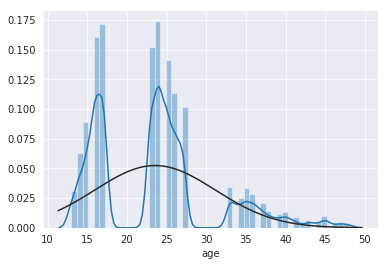

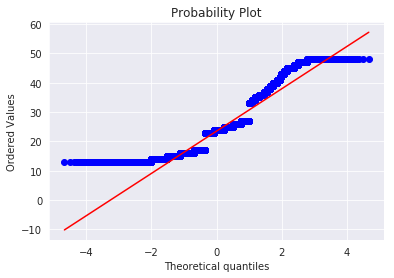

In [14]:
def is_skewed(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
is_skewed('age')


 mu = 3.15 and sigma = 0.30



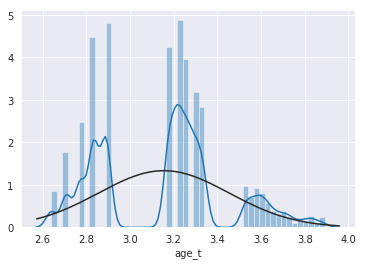

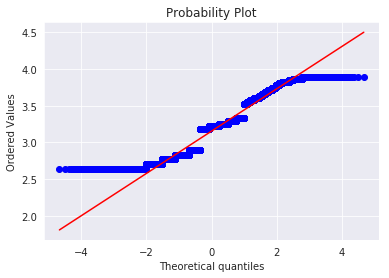

In [28]:
train["age_t"] = np.log1p(train["age"])
is_skewed('age_t')

In [60]:
lasso =  make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
cross_val_score(lasso, train_data, train['age'], cv=4)

array([0.3264994 , 0.29403116, 0.28318249, 0.3233871 ])

In [43]:
xgbm = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
cross_val_score(xgbm, train_data, train['age'], cv=4)

array([-0.01645994, -0.01790428, -0.01704773, -0.02609281])

In [20]:
import gc
gc.collect()

0

In [27]:
xgbm = xgb.XGBRegressor(n_estimators=360, max_depth=4, learning_rate=0.1)
cross_val_score(xgbm, train_data, train['age'], cv=4)

array([0.34740275, 0.34039158, 0.32054995, 0.36691908])

In [57]:
xgbm.fit(train_data, train['age'])
preds = xgbm.predict(test_data)
solution = pd.DataFrame({"user.id":test["user.id"], "age":preds})
solution = solution.groupby('user.id', as_index=False)['age'].mean()
solution.to_csv("solutions/word_vecs_metadata_xgbm.csv", index = False)

In [17]:
lasso.fit(train_data, train['age'])
preds_lasso = lasso.predict(test_data)
solution_lasso = pd.DataFrame({"user.id":test["user.id"], "age":preds_lasso})
solution_lasso = solution_lasso.groupby('user.id', as_index=False)['age'].mean()
solution_lasso.to_csv("solutions/word_vecs_metadata_lasso_normalization.csv", index = False)

In [ ]:
xgbm = xgb.XGBRegressor(n_estimators=360, max_depth=4, learning_rate=0.1)
cross_val_score(xgbm, train_data, train['age_t'], cv=4)

In [53]:
solution_lasso

,user.id,age
0,2,24.761067
1,8,25.495213
2,9,24.925085
3,10,26.526832
4,11,24.274663
5,13,15.400177
6,20,27.654866
7,26,20.572959
8,27,18.550301
9,29,24.293351


In [20]:
a

0    [[info, found, pages, mb, pdf, files, wait, un...
1    [[team, members, drewes, van, der, laag, urlli...
2    [[het, kader, van, kernfusie, op, aarde, maak,...
3                           [[testing], [testing], []]
4    [[thanks, yahoo], [toolbar, capture, urls, pop...
5    [[interesting, conversation, dad, morning], [t...
6    [[somehow, coca, cola, way, summing, things, w...
7    [[anything, korea, country, extremes], [everyt...
8    [[take, read, news, article, urllink, joongang...
9    [[surf, english, news, sites, lot, looking, ti...
dtype: object